In [1]:
#importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning the data specifically the job_posted_date column
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df_work = df.copy()

In [3]:
#get median values for salary_year_avg and salary_hour_avg
median_salary_year_avg = df_work['salary_year_avg'].median()
#median_salary_hour_avg = df['salary_hour_avg'].median()


#replace Nan values with median values
df_work['salary_year_avg'] = df_work['salary_year_avg'].fillna(median_salary_year_avg)
#df['salary_hour_avg'] = df.loc[:,'salary_hour_avg'].fillna(median_salary_hour_avg)

In [4]:
df_unique = df_work.drop_duplicates()

In [5]:
df_unique = df_unique.drop_duplicates(subset=['company_name', 'job_title']).copy()

In [28]:
#load coffee dataset 
#test duplicates no_duplicates
coffee = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/warmup-data/coffee.csv')
no_duplicates = coffee.drop_duplicates(subset=['Coffee Type', 'Units Sold'], keep='last', ignore_index=True).copy()

In [6]:
top_countries = df_unique['job_country'].value_counts().head(10).index

In [ ]:
#Pivot table
#Transforming the data
df_pivot = df.pivot_table(
    values='salary_year_avg',        # The data to aggregate
    index='job_country',             # Rows (index of pivot table)
    columns='job_title_short',       # Columns (pivot table headers)
    aggfunc='median'                 # Aggregation function
)

#top 10 countries
df_pivot = df_pivot.loc[top_countries]

In [11]:
#job titles of interest
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']


df_pivot = df_pivot[job_titles]

Text(0.5, 1.0, 'Average Salary by Country')

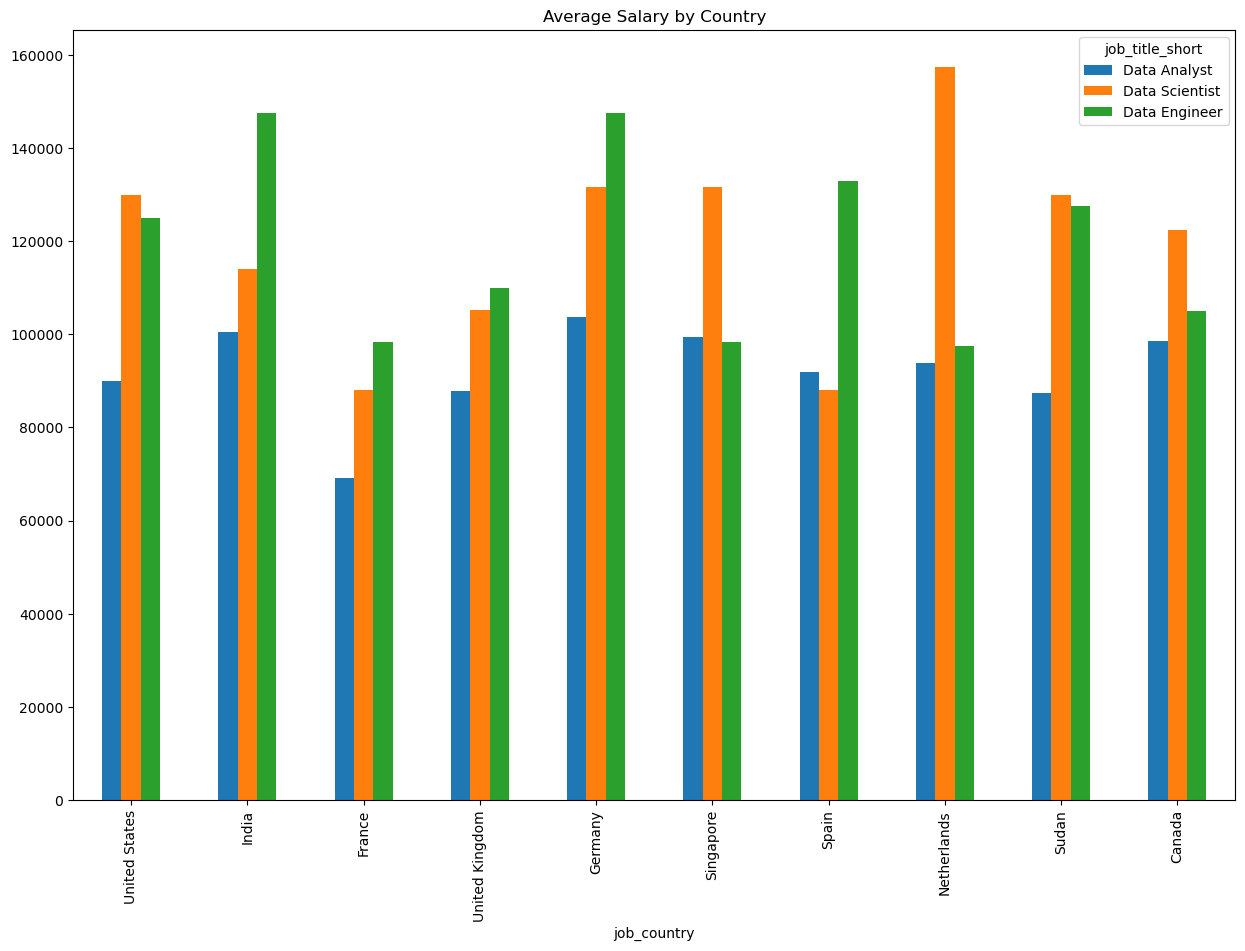

In [12]:
#plot pivoted data
df_pivot.plot(kind = 'bar', figsize=(15, 10))
plt.title('Average Salary by Country')

In [15]:
#ffilter usa and reset index
df_usa = df[df['job_country'] == 'United States'].copy()


df_usa.reset_index(inplace=True)

#set index on index column
df_usa.set_index('index', inplace=True)

df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
